<a href="https://colab.research.google.com/github/barcygan/python/blob/master/weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import pandas as pd
import numpy as np

file = '/content/weather.csv'

df = pd.read_csv(file)

In [65]:
#konwertowanie kolumny z datą do DATETIME
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y/%m/%d')

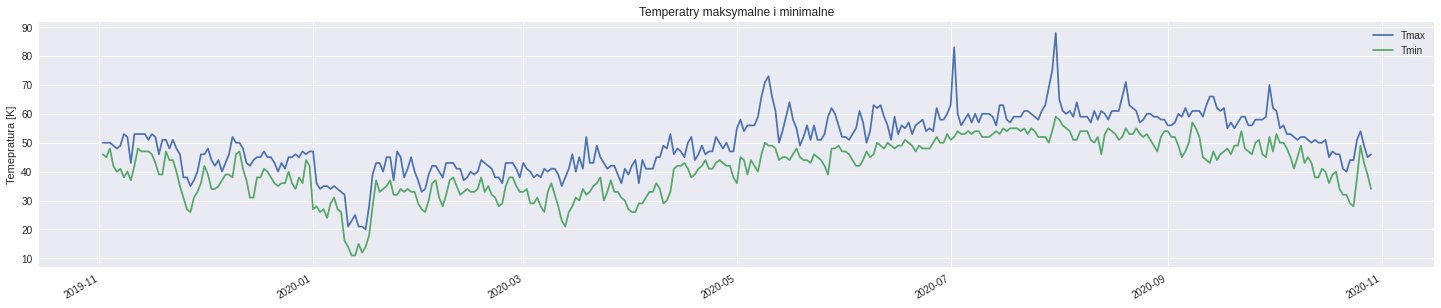

In [72]:
import matplotlib.pyplot as plt
import datetime as dt

df_october = df[(df['DATE'] > '2019-11-01') & (df['DATE'] < '2020-10-30')]

plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(25,5))

ax.plot(df_october['DATE']  ,df_october['TMAX'], label = 'Tmax' )
ax.plot(df_october['DATE']  ,df_october['TMIN'], label = 'Tmin' )
ax.set_title('Temperatry maksymalne i minimalne')
ax.set_xlabel('')
ax.set_ylabel('Temepratura [K]')
fig.autofmt_xdate()
ax.legend()
#ax.fill_between(df_october['DATE'],df_october['TMAX'],df_october['TMIN'])

plt.show()